When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNetCV


from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

from scipy.stats import zscore
from scipy import stats

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv",index_col="Unnamed: 0")

In [7]:
df

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [8]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

Sales is the target column , it is numerical column and it is a regression problem
other features TV, RADIO,newspaper are independent columns.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


No missing data in any feature

In [11]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Median of Tv is 149 , radio is 22.9 , Newspaper is 25 and sales is 12
mean of Tv is 147.042500, radio is 23.264000, newspaper is 30.554000 and sales is 14.022500

In [12]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## EDA

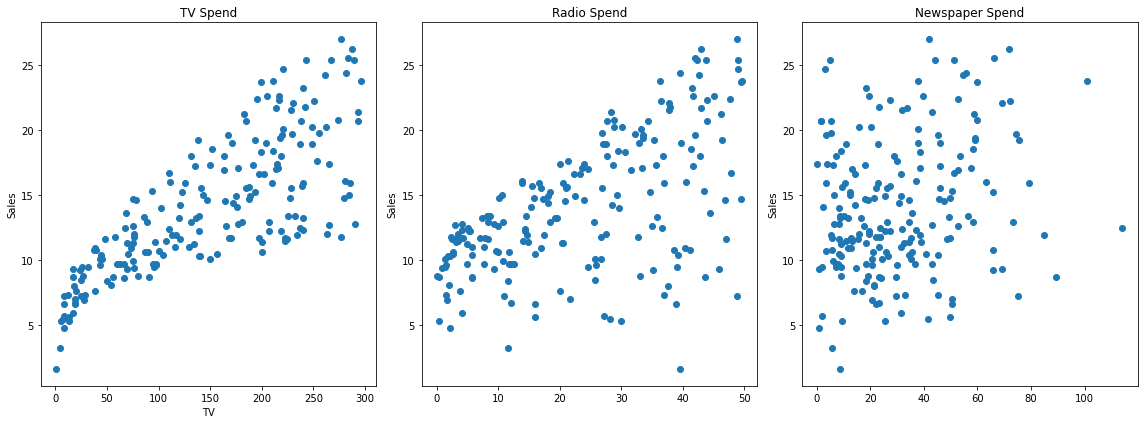

In [17]:
zScores=np.abs(zscore(df.drop(['sales'],axis=1)))
zScores

array([[9.69852266e-01, 9.81522472e-01, 1.77894547e+00],
       [1.19737623e+00, 1.08280781e+00, 6.69578760e-01],
       [1.51615499e+00, 1.52846331e+00, 1.78354865e+00],
       [5.20496822e-02, 1.21785493e+00, 1.28640506e+00],
       [3.94182198e-01, 8.41613655e-01, 1.28180188e+00],
       [1.61540845e+00, 1.73103399e+00, 2.04592999e+00],
       [1.04557682e+00, 6.43904671e-01, 3.24708413e-01],
       [3.13436589e-01, 2.47406325e-01, 8.72486994e-01],
       [1.61657614e+00, 1.42906863e+00, 1.36042422e+00],
       [6.16042873e-01, 1.39530685e+00, 4.30581584e-01],
       [9.45155670e-01, 1.17923146e+00, 2.92486143e-01],
       [7.90028350e-01, 4.96973404e-02, 1.22232878e+00],
       [1.43908760e+00, 7.99208859e-01, 1.62704048e+00],
       [5.78501712e-01, 1.05768905e+00, 1.07502697e+00],
       [6.66253447e-01, 6.50657027e-01, 7.11007392e-01],
       [5.64664612e-01, 1.65000572e+00, 1.02862691e+00],
       [9.25304978e-01, 9.00494200e-01, 3.84117072e+00],
       [1.56887609e+00, 1.10306

In [18]:
filteredEntries=(zScores<3).all(axis=1)
filteredEntries

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [19]:
np.sum(filteredEntries)

198

In [21]:
((200-198)/4177)*100

0.047881254488867604

only 0.04% data is outliers so removing them

In [22]:
df=df[filteredEntries]


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         198 non-null    float64
 1   radio      198 non-null    float64
 2   newspaper  198 non-null    float64
 3   sales      198 non-null    float64
dtypes: float64(4)
memory usage: 7.7 KB


## EDA

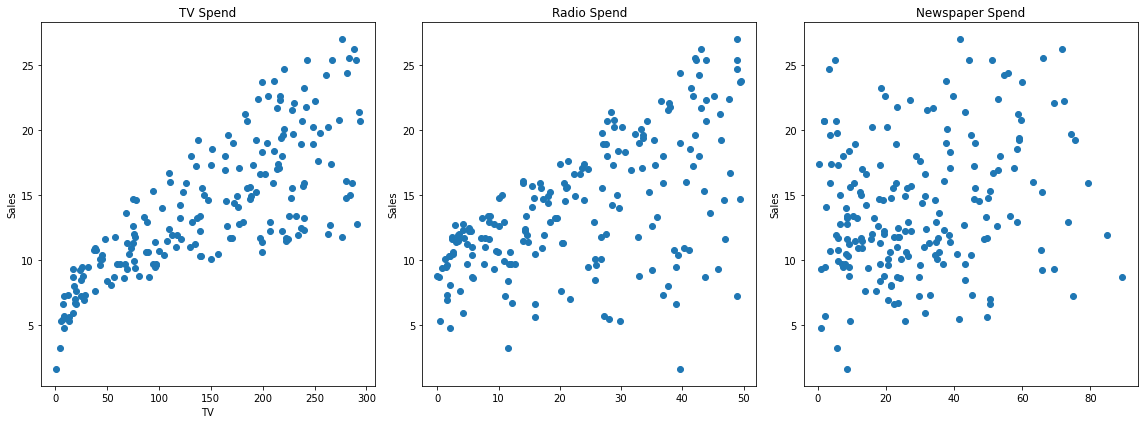

In [24]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")
axes[0].set_xlabel("TV")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

As the spend on Tv is increasing Sales is increasing
As the spend on radio is increasinng sales is increasing and even with radio spend of more than 50 there is less than 5 sales
As the spend on newspaper is increasinng sales is increasing and even with newspaper spend of more than 60 there is less than 10 sales


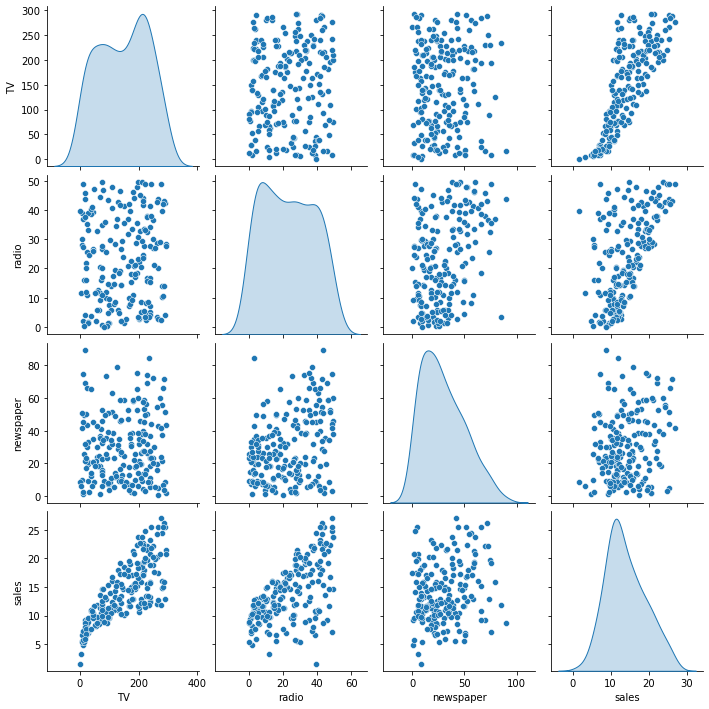

In [25]:
# Relationships between features
sns.pairplot(df,diag_kind='kde')

there is some skewness in all features

## removing skewness

In [26]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [27]:
for column in df.columns[:-1]:
    print(column , df[column].skew())

TV -0.08233208466403653
radio 0.11484208726730326
newspaper 0.650111551724088


newspaper is a it more skewed than 0.5

In [28]:
def min_skewness(colu):
    min_Skew=np.abs(df[colu].skew())
    print("initial",min_Skew)
    
    box_col_Skew=10
    min_SkewType=""
    log_col=np.log(df[colu])
    sqrt_col=np.sqrt(df[colu])
    try:
        box_col=stats.boxcox(df[colu])[0]
        box_col_Skew=np.abs(pd.Series(box_col).skew())
        print(box_col_Skew)

    except ValueError:
        print("hi")
    
    log_col_Skew=np.abs(log_col.skew())
    sqrt_col_Skew=np.abs(sqrt_col.skew())
    
    print(log_col_Skew)
    print(sqrt_col_Skew)
    
    if log_col_Skew<min_Skew:
        min_SkewType="log"
        min_Skew=log_col_Skew
    if sqrt_col_Skew<min_Skew:
        min_SkewType="sqrt"
        min_Skew=sqrt_col_Skew
    if box_col_Skew<min_Skew:
        min_SkewType="box"
        min_Skew=box_col_Skew
    print(min_Skew)
    print(column,"=",min_SkewType)
        



In [29]:
moreSkew=['newspaper']
for column in moreSkew:
    print(column)
    min_skewness(column)
    print("="*20)

newspaper
initial 0.650111551724088
0.11731170877824974
1.2218015871925096
0.040649472621842535
0.040649472621842535
newspaper = sqrt


based on the above output apply the sqrt transformation to newspaper as it gives minimum skew.

In [30]:
df['newspaper']=(np.sqrt(df['newspaper']))

In [32]:
for column in df.columns[:-1]:
    print(column , df[column].skew())

TV -0.08233208466403653
radio 0.11484208726730326
newspaper -0.040649472621842535


Now all features are having very less skew(between -0.5 and +0.5)

<AxesSubplot:xlabel='newspaper'>

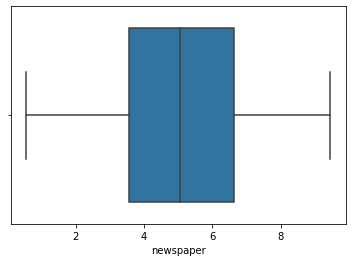

In [34]:
sns.boxplot(data=df,x='newspaper')

No outliers now

<AxesSubplot:xlabel='TV'>

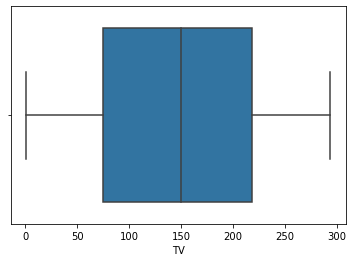

In [36]:
sns.boxplot(data=df,x='TV')

No outliers in TV 

<AxesSubplot:xlabel='radio'>

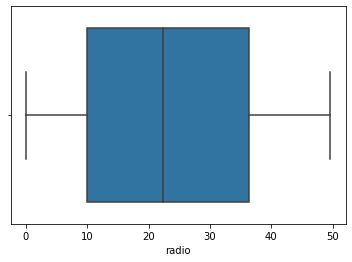

In [38]:
sns.boxplot(data=df,x='radio')

No outliers here as well

Divinding into X and Y

In [41]:
y=df['sales']
X=df.drop('sales',axis=1)

## identifying the best random state

In [44]:
minRMSE="null"
minRS=0
for i in range(200):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    pred=lr.predict(X_test)
    RMSE=np.sqrt(mean_squared_error(y_test,pred))
    if(minRMSE=="null" or RMSE<minRMSE):
        minRMSE=RMSE
        minRS=i
        
print("min RMSE is",minRMSE,"on random state",minRS)

min RMSE is 1.3446811466048851 on random state 193


min RMSE is 1.3446811466048851 on random state 193

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=193)


## Scaling

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()

In [48]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [49]:
x_train_scale=scaler.fit_transform(X_train)


In [50]:
X_train.columns

Index(['TV', 'radio', 'newspaper'], dtype='object')

In [51]:
XtrainDF=pd.DataFrame(x_train_scale,columns=X_train.columns)
XtrainDF

,TV,radio,newspaper
0,-1.449199,1.311855,2.113491
1,1.245246,0.199149,-1.362296
2,-0.858342,-0.224739,-0.417500
3,0.244290,1.199260,-1.581228
4,-1.153206,0.185903,0.387498
...,...,...,...
127,0.542543,-0.363827,1.453721
128,0.592252,-0.039288,-0.666605
129,-1.075253,-0.814208,-0.411794
130,-1.593807,-0.814208,-1.341637


In [53]:
XtrainDF.describe()

,TV,radio,newspaper
count,1.320000e+02,1.320000e+02,1.320000e+02
mean,-1.026115e-16,1.665335e-16,1.127045e-16
std,1.003810e+00,1.003810e+00,1.003810e+00
min,-1.632218e+00,-1.556012e+00,-2.241019e+00
25%,-8.865855e-01,-8.903754e-01,-7.580877e-01
50%,1.380944e-01,-2.935304e-02,-1.725367e-03
75%,8.724294e-01,9.955947e-01,7.842266e-01
max,1.676809e+00,1.689380e+00,2.113491e+00


In [55]:
x_test_scale=scaler.transform(X_test)
x_test_scale

array([[-7.34069713e-01, -1.58250492e+00, -1.02598651e+00],
       [ 4.02454968e-01, -8.67194031e-01,  1.22710164e+00],
       [-3.99664837e-01, -6.35380316e-01,  2.43650320e-01],
       [ 2.39899895e-02,  4.51585157e-04, -3.72277503e-01],
       [ 2.62366438e-01, -1.11225424e+00, -7.59772287e-01],
       [ 1.04189132e+00, -1.24471922e+00, -1.38931169e-01],
       [ 7.27821874e-01, -2.18115631e-01, -9.09668899e-01],
       [ 6.09198523e-01,  4.44209266e-01,  5.32400370e-01],
       [ 9.59419846e-01,  9.21083193e-01,  1.55789746e+00],
       [ 1.10741660e+00,  1.66288708e+00,  7.45002771e-01],
       [ 1.59094797e+00, -6.61873312e-01, -1.56843398e+00],
       [-9.66797431e-01, -7.87715043e-01,  7.00630935e-01],
       [-7.77000069e-01,  1.85902556e-01, -2.00230738e-01],
       [-3.16063618e-01, -6.08887321e-01, -1.37276602e+00],
       [ 8.19331317e-01,  6.36283487e-01,  1.24624377e+00],
       [-1.42773388e+00, -1.45259892e-01,  9.61799178e-01],
       [ 5.11038984e-02,  7.75371715e-01

In [56]:
XtestDF=pd.DataFrame(x_test_scale,columns=X_train.columns)
XtestDF

,TV,radio,newspaper
0,-0.734070,-1.582505,-1.025987
1,0.402455,-0.867194,1.227102
2,-0.399665,-0.635380,0.243650
3,0.023990,0.000452,-0.372278
4,0.262366,-1.112254,-0.759772
...,...,...,...
61,-0.249409,0.709139,-0.787317
62,-0.558959,-1.489779,-1.178930
63,-0.278782,0.305121,-0.666605
64,0.741379,1.702627,0.492851


In [57]:
lr=LinearRegression()
lr.fit(XtrainDF,y_train)
pred=lr.predict(XtestDF)

lrR2=r2_score(y_test, pred)
lrR2

0.9251211244377999

In [58]:
lrRMSE=np.sqrt(mean_squared_error(y_test,pred))
lrRMSE

1.3446811466048847

In [59]:
svr=SVR()
svr.fit(XtrainDF,y_train)
pred=svr.predict(XtestDF)
svrR2=r2_score(y_test, pred)
svrR2

0.9251440385836505

In [60]:
svrRMSE=np.sqrt(mean_squared_error(y_test,pred))
svrRMSE

1.3444753837825634

In [61]:
sgd=SGDRegressor()
sgd.fit(XtrainDF,y_train)
pred=sgd.predict(XtestDF)
sgdR2=r2_score(y_test, pred)
sgdR2

0.9242596769508603

In [62]:
sgdRMSE=np.sqrt(mean_squared_error(y_test,pred))
sgdRMSE

1.3523940000429822

In [63]:
knnR=KNeighborsRegressor()
knnR.fit(XtrainDF,y_train)
pred=knnR.predict(XtestDF)
knnR2=r2_score(y_test, pred)
knnR2

0.9445191667813816

In [64]:
knnrRMSE=np.sqrt(mean_squared_error(y_test,pred))
knnrRMSE

1.1574737381666398

## frinding cross val score for each model

In [65]:
from sklearn.pipeline import Pipeline


In [67]:

operations = [('scaler',StandardScaler()),('lr',lr)]
pipe=Pipeline(operations)
lrCV=cross_val_score(pipe,X,y,cv=5,scoring='r2').mean()
lrCV

0.8857406146589945

In [68]:

operations = [('scaler',StandardScaler()),('svr',svr)]
pipe=Pipeline(operations)

svrCV=cross_val_score(pipe,X,y,cv=5,scoring='r2').mean()
svrCV

0.9042724072441943

In [69]:
operations = [('scaler',StandardScaler()),('sgd',sgd)]
pipe=Pipeline(operations)

sgdCV=cross_val_score(pipe,X,y,cv=5,scoring='r2').mean()
sgdCV

0.886045388307356

In [70]:
operations = [('scaler',StandardScaler()),('knnr',knnR)]
pipe=Pipeline(operations)

knnrCV=cross_val_score(pipe,X,y,cv=5,scoring='r2').mean()
knnrCV

0.9357311955300013

In [71]:
def rmseValue(model,indepen,depend):
    y_pred=model.predict(indepen)
    return np.sqrt(mean_squared_error(y_pred,depend))

operations = [('scaler',StandardScaler()),('lr',lr)]
pipe=Pipeline(operations)
lrCV1=cross_val_score(pipe,X,y,cv=5,scoring=rmseValue).mean()

operations = [('scaler',StandardScaler()),('svr',svr)]
pipe=Pipeline(operations)
svrCV1=cross_val_score(pipe,X,y,cv=5,scoring=rmseValue).mean()

operations = [('scaler',StandardScaler()),('SGD',sgd)]
pipe=Pipeline(operations)
sgdCV1=cross_val_score(pipe,X,y,cv=5,scoring=rmseValue).mean()

operations = [('scaler',StandardScaler()),('knnr',knnR)]
pipe=Pipeline(operations)
knnrCV1=cross_val_score(pipe,X,y,cv=5,scoring=rmseValue).mean()


### Comparing r2 scores for normal model and cross val score

In [72]:
print(lrR2-lrCV)
print(svrR2-svrCV)
print(sgdR2-sgdCV)
print(knnR2-knnrCV)

0.03938050977880547
0.02087163133945613
0.03821428864350429
0.008787971251380311


KNN Regression Vector Regressor is the best method, as the difference between r2Score for cross val score and normal model r2Score is less (0.008787971251380311)

In [73]:
print(lrRMSE-lrCV1)
print(svrRMSE-svrCV1)
print(sgdRMSE-sgdCV1)
print(knnrRMSE-knnrCV1)

-0.3806077649899431
-0.20400424937713635
-0.3725630224356067
-0.1238213530107597


## Hyper Parameter Tuning using a pipeline for KNNR

In [74]:
help(knnR)

Help on KNeighborsRegressor in module sklearn.neighbors._regression object:

class KNeighborsRegressor(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.RegressorMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsRegressor(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)
 |  
 |  Regression based on k-nearest neighbors.
 |  
 |  The target is predicted by local interpolation of the targets
 |  associated of the nearest neighbors in the training set.
 |  
 |  Read more in the :ref:`User Guide <regression>`.
 |  
 |  .. versionadded:: 0.9
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'} or callable, default='uniform'
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborho

In [75]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures



In [ ]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)


In [77]:
operations = [('poly',PolynomialFeatures()),('scaler',StandardScaler()),('knnR',KNeighborsRegressor())]

In [78]:
pipe = Pipeline(operations)

In [79]:
param_grid = {'poly__degree':[1,2,3],
             'poly__include_bias':[True,False],
              'knnR__n_neighbors':[5,6,7],
              'knnR__n_jobs':[3]}

In [80]:
grid = GridSearchCV(pipe,param_grid,cv=5,scoring='neg_mean_squared_error',verbose=10)

In [81]:
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "score_samples", "predict", "predict_proba",
 |  "decision_function", "transform" and "inverse_transform" if they are
 |  implemented in the estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object.
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either es

In [82]:
grid.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5; 1/18] START knnR__n_jobs=3, knnR__n_neighbors=5, poly__degree=1, poly__include_bias=True
[CV 1/5; 1/18] END knnR__n_jobs=3, knnR__n_neighbors=5, poly__degree=1, poly__include_bias=True;, score=-1.474 total time=   8.7s
[CV 2/5; 1/18] START knnR__n_jobs=3, knnR__n_neighbors=5, poly__degree=1, poly__include_bias=True
[CV 2/5; 1/18] END knnR__n_jobs=3, knnR__n_neighbors=5, poly__degree=1, poly__include_bias=True;, score=-1.279 total time=   0.0s
[CV 3/5; 1/18] START knnR__n_jobs=3, knnR__n_neighbors=5, poly__degree=1, poly__include_bias=True
[CV 3/5; 1/18] END knnR__n_jobs=3, knnR__n_neighbors=5, poly__degree=1, poly__include_bias=True;, score=-0.862 total time=   0.0s
[CV 4/5; 1/18] START knnR__n_jobs=3, knnR__n_neighbors=5, poly__degree=1, poly__include_bias=True
[CV 4/5; 1/18] END knnR__n_jobs=3, knnR__n_neighbors=5, poly__degree=1, poly__include_bias=True;, score=-3.686 total time=   0.0s
[CV 5/5; 1/18] START knnR__

[CV 3/5; 9/18] END knnR__n_jobs=3, knnR__n_neighbors=6, poly__degree=2, poly__include_bias=True;, score=-0.952 total time=   0.0s
[CV 4/5; 9/18] START knnR__n_jobs=3, knnR__n_neighbors=6, poly__degree=2, poly__include_bias=True
[CV 4/5; 9/18] END knnR__n_jobs=3, knnR__n_neighbors=6, poly__degree=2, poly__include_bias=True;, score=-3.877 total time=   0.0s
[CV 5/5; 9/18] START knnR__n_jobs=3, knnR__n_neighbors=6, poly__degree=2, poly__include_bias=True
[CV 5/5; 9/18] END knnR__n_jobs=3, knnR__n_neighbors=6, poly__degree=2, poly__include_bias=True;, score=-1.248 total time=   0.0s
[CV 1/5; 10/18] START knnR__n_jobs=3, knnR__n_neighbors=6, poly__degree=2, poly__include_bias=False
[CV 1/5; 10/18] END knnR__n_jobs=3, knnR__n_neighbors=6, poly__degree=2, poly__include_bias=False;, score=-2.095 total time=   0.0s
[CV 2/5; 10/18] START knnR__n_jobs=3, knnR__n_neighbors=6, poly__degree=2, poly__include_bias=False
[CV 2/5; 10/18] END knnR__n_jobs=3, knnR__n_neighbors=6, poly__degree=2, poly__inc

[CV 2/5; 17/18] END knnR__n_jobs=3, knnR__n_neighbors=7, poly__degree=3, poly__include_bias=True;, score=-1.769 total time=   0.0s
[CV 3/5; 17/18] START knnR__n_jobs=3, knnR__n_neighbors=7, poly__degree=3, poly__include_bias=True
[CV 3/5; 17/18] END knnR__n_jobs=3, knnR__n_neighbors=7, poly__degree=3, poly__include_bias=True;, score=-1.482 total time=   0.0s
[CV 4/5; 17/18] START knnR__n_jobs=3, knnR__n_neighbors=7, poly__degree=3, poly__include_bias=True
[CV 4/5; 17/18] END knnR__n_jobs=3, knnR__n_neighbors=7, poly__degree=3, poly__include_bias=True;, score=-4.099 total time=   0.0s
[CV 5/5; 17/18] START knnR__n_jobs=3, knnR__n_neighbors=7, poly__degree=3, poly__include_bias=True
[CV 5/5; 17/18] END knnR__n_jobs=3, knnR__n_neighbors=7, poly__degree=3, poly__include_bias=True;, score=-1.367 total time=   0.0s
[CV 1/5; 18/18] START knnR__n_jobs=3, knnR__n_neighbors=7, poly__degree=3, poly__include_bias=False
[CV 1/5; 18/18] END knnR__n_jobs=3, knnR__n_neighbors=7, poly__degree=3, poly__

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('scaler', StandardScaler()),
                                       ('knnR', KNeighborsRegressor())]),
             param_grid={'knnR__n_jobs': [3], 'knnR__n_neighbors': [5, 6, 7],
                         'poly__degree': [1, 2, 3],
                         'poly__include_bias': [True, False]},
             scoring='neg_mean_squared_error', verbose=10)

In [83]:
grid.best_estimator_

Pipeline(steps=[('poly', PolynomialFeatures(degree=1)),
                ('scaler', StandardScaler()),
                ('knnR', KNeighborsRegressor(n_jobs=3))])

In [84]:
grid.best_params_

{'knnR__n_jobs': 3,
 'knnR__n_neighbors': 5,
 'poly__degree': 1,
 'poly__include_bias': True}

In [85]:
grid.best_score_

-1.7545489743589744

In [86]:
print(grid.cv_results_)

{'mean_fit_time': array([0.01236525, 0.00453777, 0.00465488, 0.00580983, 0.00510492,
       0.00246177, 0.00392261, 0.00464735, 0.00767646, 0.0051147 ,
       0.00462537, 0.00320725, 0.0043663 , 0.00412741, 0.00491924,
       0.00653539, 0.00405474, 0.00861435]), 'std_fit_time': array([0.00943139, 0.00044033, 0.00034937, 0.00085086, 0.00782865,
       0.00492353, 0.00273805, 0.00078422, 0.00142457, 0.00079471,
       0.00319681, 0.0039281 , 0.00579955, 0.00028429, 0.00035501,
       0.00098317, 0.00357944, 0.00080035]), 'mean_score_time': array([1.76830473, 0.00862851, 0.00949831, 0.00952425, 0.18044777,
       0.12430534, 0.01608963, 0.01105309, 0.01313353, 0.00920839,
       0.11943722, 0.11917572, 0.01307235, 0.00781722, 0.00830731,
       0.01133761, 0.11768913, 0.11520281]), 'std_score_time': array([3.51431546e+00, 6.29049258e-04, 1.01716953e-03, 8.52424979e-04,
       1.22190873e-01, 5.91832988e-03, 3.32360970e-03, 8.20994050e-04,
       2.60441397e-03, 6.01383961e-04, 3.78719860

In [87]:
grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_knnR__n_jobs', 'param_knnR__n_neighbors', 'param_poly__degree', 'param_poly__include_bias', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [88]:
pd.DataFrame(data=grid.cv_results_,columns=grid.cv_results_.keys())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knnR__n_jobs,param_knnR__n_neighbors,param_poly__degree,param_poly__include_bias,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012365,0.009431,1.768305,3.514315,3,5,1,True,"{'knnR__n_jobs': 3, 'knnR__n_neighbors': 5, 'p...",-1.473890,-1.278890,-0.861770,-3.685969,-1.472226,-1.754549,0.991178,1
1,0.004538,0.000440,0.008629,0.000629,3,5,1,False,"{'knnR__n_jobs': 3, 'knnR__n_neighbors': 5, 'p...",-1.473890,-1.278890,-0.861770,-3.685969,-1.472226,-1.754549,0.991178,1
2,0.004655,0.000349,0.009498,0.001017,3,5,2,True,"{'knnR__n_jobs': 3, 'knnR__n_neighbors': 5, 'p...",-1.910360,-1.452860,-0.917650,-3.310328,-1.268985,-1.772037,0.833113,3
3,0.005810,0.000851,0.009524,0.000852,3,5,2,False,"{'knnR__n_jobs': 3, 'knnR__n_neighbors': 5, 'p...",-1.910360,-1.452860,-0.917650,-3.310328,-1.268985,-1.772037,0.833113,3
4,0.005105,0.007829,0.180448,0.122191,3,5,3,True,"{'knnR__n_jobs': 3, 'knnR__n_neighbors': 5, 'p...",-2.020590,-1.835200,-1.059450,-3.265723,-1.242626,-1.884718,0.777359,7
5,0.002462,0.004924,0.124305,0.005918,3,5,3,False,"{'knnR__n_jobs': 3, 'knnR__n_neighbors': 5, 'p...",-2.020590,-1.835200,-1.059450,-3.265723,-1.242626,-1.884718,0.777359,7
6,0.003923,0.002738,0.016090,0.003324,3,6,1,True,"{'knnR__n_jobs': 3, 'knnR__n_neighbors': 6, 'p...",-1.781021,-1.300215,-0.919889,-3.647557,-1.495328,-1.828802,0.951513,5
7,0.004647,0.000784,0.011053,0.000821,3,6,1,False,"{'knnR__n_jobs': 3, 'knnR__n_neighbors': 6, 'p...",-1.781021,-1.300215,-0.919889,-3.647557,-1.495328,-1.828802,0.951513,5
8,0.007676,0.001425,0.013134,0.002604,3,6,2,True,"{'knnR__n_jobs': 3, 'knnR__n_neighbors': 6, 'p...",-2.095306,-1.548896,-0.952083,-3.876795,-1.248262,-1.944268,1.037559,9
9,0.005115,0.000795,0.009208,0.000601,3,6,2,False,"{'knnR__n_jobs': 3, 'knnR__n_neighbors': 6, 'p...",-2.095306,-1.548896,-0.952083,-3.876795,-1.248262,-1.944268,1.037559,9


In [89]:
grid.best_estimator_

Pipeline(steps=[('poly', PolynomialFeatures(degree=1)),
                ('scaler', StandardScaler()),
                ('knnR', KNeighborsRegressor(n_jobs=3))])

In [90]:
grid.best_params_

{'knnR__n_jobs': 3,
 'knnR__n_neighbors': 5,
 'poly__degree': 1,
 'poly__include_bias': True}

The best estimator is 
{'knnR__n_jobs': 3,
 'knnR__n_neighbors': 5,
 'poly__degree': 1,
 'poly__include_bias': True}

## Training with best parameters

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=165)

In [93]:
X_scale_train=scaler.fit_transform(X_train)


In [94]:
X_scale_test=scaler.transform(X_test)


In [95]:
Final_model=KNeighborsRegressor(n_neighbors=5,n_jobs=3)
Final_model.fit(X_scale_train,y_train)
pred=Final_model.predict(X_scale_test)


In [96]:
finalRMSE=np.sqrt(mean_squared_error(y_test,pred))
finalRMSE

0.9790100132586014

final Root mean square error of the model is only 0.97 which is very less

## saving the model


In [97]:
import joblib
joblib.dump(Final_model,"Final_model_KNN_Advertising.pkl")

['Final_model_KNN_Advertising.pkl']